In [28]:
import torch
import torch
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF
import seaborn as sns
# Reproducibility
#torch.manual_seed(1)
N = 2000  
P= 200
# Scatter of x vs y 
 

# -------------------------
# 2) Generate f (3 x 200)
#    f[0,i] ~ t1_i * N(0,1), f[1,i], f[2,i] ~ t2_i * N(0,1)
# -------------------------

t0 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t1 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t2 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t11 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t12 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t21 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t22 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1

a0 = t0 * torch.randn(P)
b1 = t1 * torch.randn(P)
b2 = t2 * torch.randn(P)
detla11= t11 *torch.randn(P)

detla12= t11 *torch.randn(P)
detla21= t11 *torch.randn(P)
detla22= t11 *torch.randn(P)  
f_mat = torch.stack([a0,b1,b2, detla11, detla12,detla21, detla22 ], dim=0)
f_mat

tensor([[-0.1662,  0.9730, -0.0281,  ...,  0.0000,  0.0000,  1.7245],
        [ 0.9787,  0.0000, -0.0000,  ..., -0.0000,  0.0000,  1.4707],
        [ 0.0000, -0.7898,  1.5441,  ..., -0.0000,  0.0000, -0.1144],
        ...,
        [ 0.0000, -0.0000, -0.0000,  ..., -0.3499, -0.4630,  0.2173],
        [ 0.0000, -0.0000,  0.0000,  ..., -0.1061,  1.0540,  0.6925],
        [-0.0000,  0.0000,  0.0000,  ...,  0.2023,  0.6802, -1.5715]])

In [29]:

N= 1000

L = torch.zeros(N, 7, dtype=torch.float32)


L[:,0]=1
L[0:500, 1]=1

L [500:,2]=1
L[0:250,3]=1
L[251:500,4]=1

L[501:750,5]=1

L[751:,6]=1

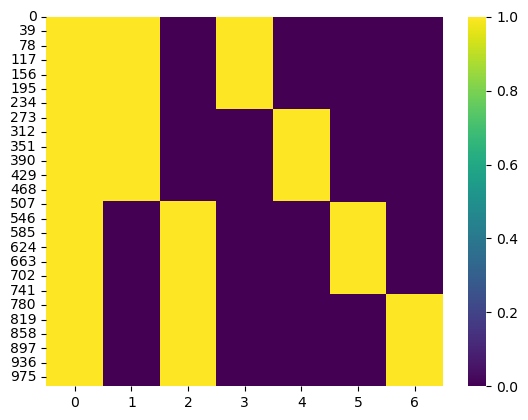

In [30]:


sns.heatmap(L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()


In [31]:
L.shape

torch.Size([1000, 7])

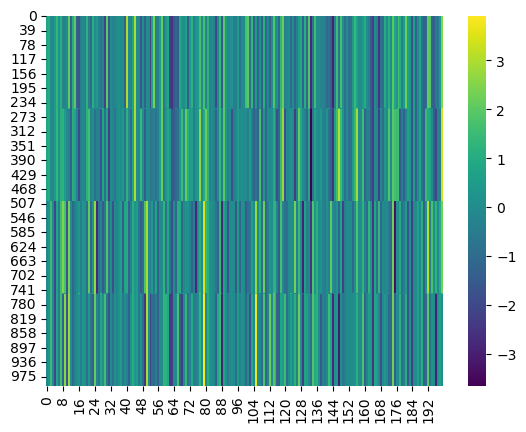

In [32]:
X_true= L@f_mat 
Z = L@f_mat + torch.randn(N, P)  * 2.5  # (N, M)
sns.heatmap(X_true , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

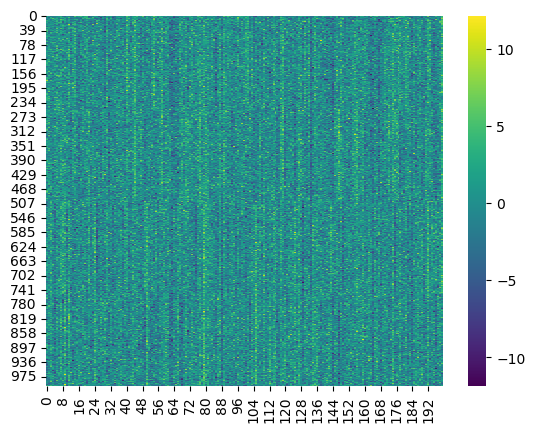

In [33]:
sns.heatmap(Z , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [34]:

mycebmf0=  cEBMF(data=Z ,K=10 ) 
mycebmf0.initialize()
mycebmf0.fit(10)

10
10
10
10
10
10
10
10
10
10


CEBMFResult(L=tensor([[ 5.7069e+00,  1.0255e+01,  9.1782e+00,  ...,  1.9762e-08,
         -7.2148e-08,  6.9852e-13],
        [ 5.7811e+00,  6.5304e+00,  3.1815e+00,  ..., -3.5209e-08,
         -4.9201e-08, -4.3514e-13],
        [ 9.9844e+00,  7.0068e+00,  1.9392e+00,  ...,  5.7169e-09,
         -3.4669e-07, -3.3226e-13],
        ...,
        [ 8.8333e+00, -5.5070e+00,  5.3976e+00,  ...,  5.1915e-08,
          1.0214e-07, -4.1626e-13],
        [ 1.1040e+01, -7.6156e+00,  4.8380e+00,  ..., -1.6430e-08,
          1.2385e-07, -4.0188e-14],
        [ 9.7773e+00, -5.4216e+00,  1.0773e-01,  ...,  5.1359e-08,
          2.0548e-07, -7.6923e-14]]), F=tensor([[ 2.8969e-02,  5.6927e-02, -2.4973e-03,  ..., -1.4965e-19,
          3.9312e-19,  3.1246e-28],
        [ 5.4028e-02,  4.6688e-02,  4.1572e-04,  ...,  1.8283e-20,
         -4.0357e-19,  1.3589e-28],
        [ 7.4566e-02, -7.2207e-02, -4.7120e-03,  ...,  8.8328e-20,
         -5.4275e-19, -2.5548e-28],
        ...,
        [-1.9835e-02, -2.7622

In [35]:
 
mycebmf1=  cEBMF(data=Z,self_row_cov=True,
                 prior_L="sharp_cgb", K=10,
                  allow_backfitting=False ) 
mycebmf1.initialize( )
 

mycebmf1.F = mycebmf0.F
mycebmf1.fit(10)

[CGB] Epoch 10/50, Loss=15.1137, mu2=0.050, sigma2=0.023
[CGB] Epoch 20/50, Loss=15.0677, mu2=0.052, sigma2=0.023
[CGB] Epoch 30/50, Loss=15.0554, mu2=0.052, sigma2=0.023
[CGB] Epoch 40/50, Loss=15.0847, mu2=0.052, sigma2=0.023
[CGB] Epoch 50/50, Loss=15.0853, mu2=0.052, sigma2=0.023
[CGB] Epoch 10/50, Loss=9.2883, mu2=0.054, sigma2=0.023
[CGB] Epoch 20/50, Loss=9.2877, mu2=0.056, sigma2=0.024
[CGB] Epoch 30/50, Loss=9.2643, mu2=0.057, sigma2=0.024
[CGB] Epoch 40/50, Loss=9.2702, mu2=0.057, sigma2=0.024
[CGB] Epoch 50/50, Loss=9.2687, mu2=0.057, sigma2=0.024
[CGB] Epoch 10/50, Loss=4.8085, mu2=-0.021, sigma2=0.014
[CGB] Epoch 20/50, Loss=4.7875, mu2=-0.023, sigma2=0.015
[CGB] Epoch 30/50, Loss=4.7784, mu2=-0.023, sigma2=0.015
[CGB] Epoch 40/50, Loss=4.7901, mu2=-0.024, sigma2=0.015
[CGB] Epoch 50/50, Loss=4.7974, mu2=-0.024, sigma2=0.015
[CGB] Epoch 10/50, Loss=4.2840, mu2=-0.035, sigma2=0.018
[CGB] Epoch 20/50, Loss=4.2526, mu2=-0.038, sigma2=0.019
[CGB] Epoch 30/50, Loss=4.2466, mu2=

CEBMFResult(L=tensor([[0.0250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0243, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0409, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0367, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0438, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0394, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]), F=tensor([[ 7.6162,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [13.9168,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [18.3300,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-5.1353,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 8.2768,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [41.7464,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), tau=tensor(0.1461), history_obj=[535635.0625, 457879.28125, 412117.71875, 380203.75, 380230.28125, 380243.96875, 380256.25, 380270.0625, 380282.40625,

In [36]:
mycebmf1.F

tensor([[ 7.6162,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [13.9168,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [18.3300,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-5.1353,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 8.2768,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [41.7464,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([-0.5       , -0.40000001, -0.30000001, -0.19999999, -0.09999999,
         0.        ,  0.10000002,  0.19999999,  0.30000001,  0.40000004,
         0.5       ]),
 <BarContainer object of 10 artists>)

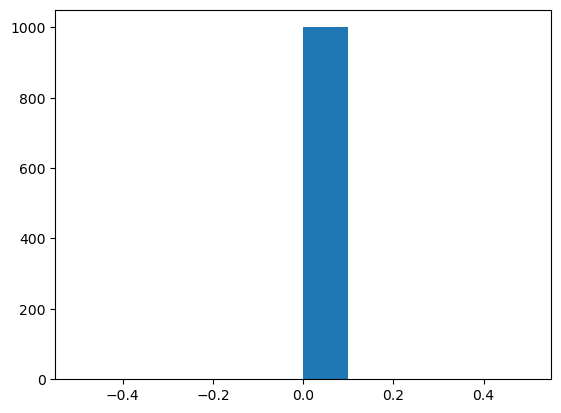

In [37]:
plt.hist(mycebmf1.L[:,5 ])


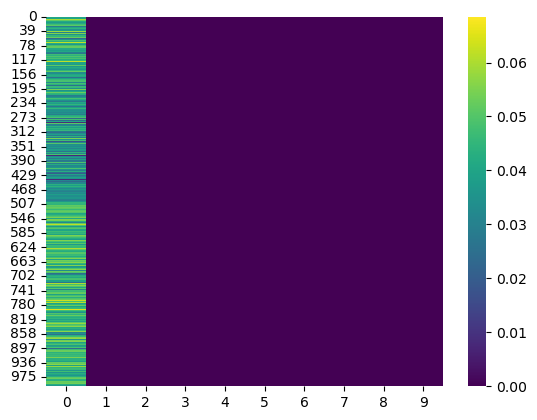

In [38]:
 
sns.heatmap(mycebmf1.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

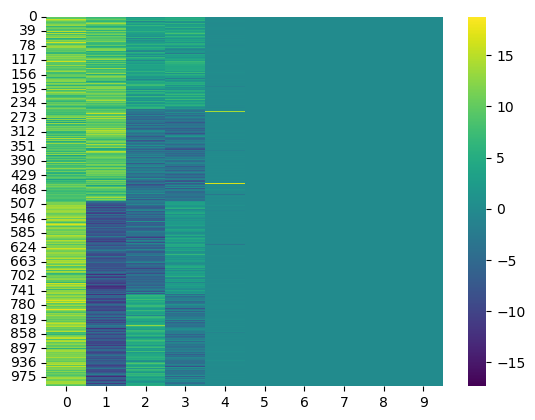

In [39]:
sns.heatmap(mycebmf0.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [40]:
mycebmf0.L[:,4]

tensor([ 1.4802e-02, -1.6643e-01, -1.4074e-02, -9.4633e-02,  5.0269e-03,
        -4.9564e-03,  1.9929e-01, -1.0840e-01,  1.5359e-02,  5.8719e-02,
         1.4009e-02,  2.3229e-02, -6.8828e-02,  1.3656e-02,  5.9913e-02,
        -1.7296e-03, -2.8733e-02,  2.6954e-03, -1.7441e-01,  1.2747e-01,
         4.4496e-02,  9.5389e-03,  1.2559e-01, -3.7843e-03,  5.8455e-02,
         6.7777e-03, -2.2235e-03, -1.2109e-02, -3.5415e-02,  5.6732e-02,
         2.7450e-02,  2.1621e-02, -1.2511e-03, -2.2833e-02,  4.4260e-02,
         6.1399e-02, -1.1024e-02, -1.3498e-02,  1.1804e-01, -1.2603e-02,
        -3.4337e-02,  1.3814e-02,  3.4267e-03, -3.9937e-01, -2.4147e-02,
        -3.4123e-02, -3.3868e-01, -1.2474e-01, -1.3657e-01, -1.0500e-03,
         5.5707e-02,  1.9090e-02, -2.1299e-01,  2.5337e-03,  6.4325e-02,
         1.3252e-01,  1.3028e-01, -2.2978e-02, -8.2643e-02, -2.1778e-01,
         8.3255e-02,  2.8533e-02, -1.1676e-01, -8.0536e-02,  5.1429e-02,
        -8.9073e-03,  3.9464e-03,  1.0403e-02, -4.2

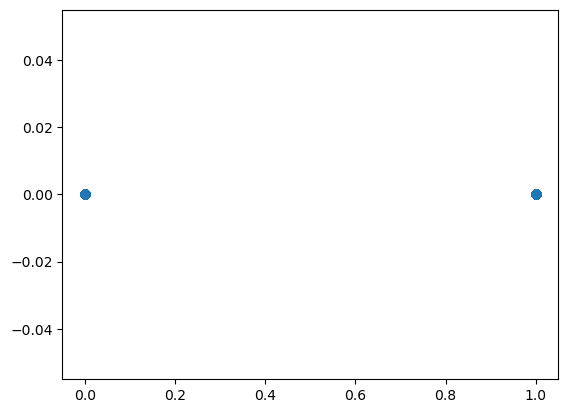

In [41]:
plt.scatter(L[:,3],mycebmf1.L[:,2])

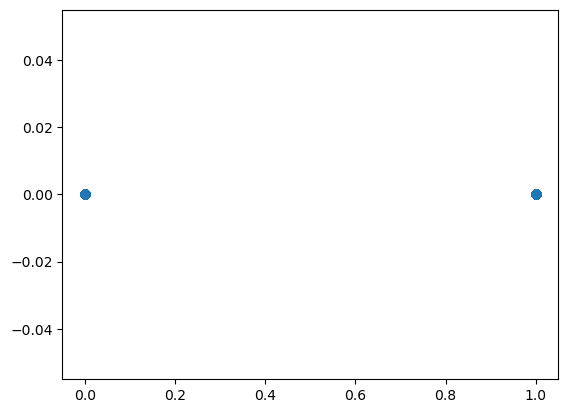

In [42]:
plt.scatter(L[:,1],mycebmf1.L[:,1])

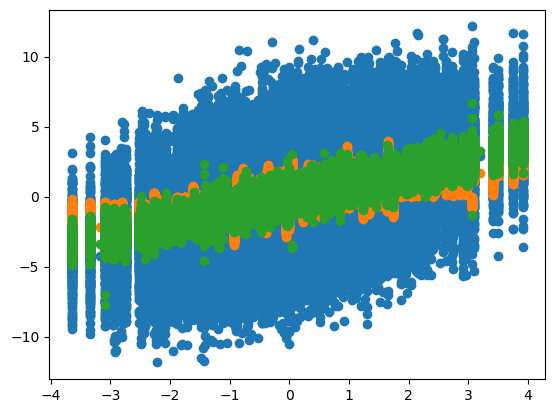

In [43]:
mycebmf0.update_fitted_value()
mycebmf1.update_fitted_value()
plt.scatter(X_true,Z)
plt.scatter(X_true,mycebmf1.Y_fit)
plt.scatter(X_true,mycebmf0.Y_fit)
